# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [8]:
# Your code here:
fifa['ValueNumeric'] = fifa['Value'].str.strip('€').str.replace('M', '').str.replace('K', '').astype('float')

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [9]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
# H0_1: all left foot players have the same mean value, all right foor players have the same mean value
# H0_2: all players with the same position on the field have the same mean value

In [19]:
fifa.rename(columns={'Preferred Foot':'Preferred_Foot'},inplace=True) 

In [20]:
fifa_lm = ols('ValueNumeric ~ C(Preferred_Foot, Sum)*C(Position, Sum)',data=fifa).fit()

In [21]:
table_lm = sm.stats.anova_lm(fifa_lm, typ=2)

In [22]:
print(table_lm)

                                               sum_sq       df         F  \
C(Preferred_Foot, Sum)                   7.292211e+04      1.0  0.872300   
C(Position, Sum)                         8.767522e+06     26.0  4.033759   
C(Preferred_Foot, Sum):C(Position, Sum)  3.050243e+06     26.0  1.403355   
Residual                                 1.512530e+09  18093.0       NaN   

                                               PR(>F)  
C(Preferred_Foot, Sum)                   3.503319e-01  
C(Position, Sum)                         2.141952e-11  
C(Preferred_Foot, Sum):C(Position, Sum)  8.327900e-02  
Residual                                          NaN  


What is your conclusion from this ANOVA?

In [23]:
# Your conclusions here:
# pvalues < 0.05 meaning we can reject H0_1 and H0_2

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [24]:
# Your code here:
fifa_nat = ols('ValueNumeric ~ C(Nationality, Sum)',data=fifa).fit()
table_nat = sm.stats.anova_lm(fifa_nat, typ=1)
print(table_nat)

                          df        sum_sq        mean_sq         F  \
C(Nationality, Sum)    163.0  4.292914e+07  263368.987135  3.202987   
Residual             18043.0  1.483605e+09   82226.058289       NaN   

                           PR(>F)  
C(Nationality, Sum)  1.976253e-38  
Residual                      NaN  


What is your conclusion from this ANOVA?

In [26]:
# pvalue < 0.05, we can reject H0. The mean values of the players with different nationalities are different

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [27]:
# Your code here:
fifa.isna().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred_Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric        0
dtype: int64

In [30]:
fifa = fifa.dropna(how='any',axis=0) 

In [31]:
fifa.isna().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred_Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueNumeric      0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [32]:
# Your code here:
X = fifa[['Stamina', 'SprintSpeed']]
y = fifa['ValueNumeric']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [33]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Fri, 04 Feb 2022   Prob (F-statistic):             0.0116
Time:                        23:40:21   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [34]:
# Your conclusions here:
# F-stats = 4.454 > 1 meaning we reject H0 hypothesis. There is a statistically significant relationship between X and y.
# R-squared = 0 meaning variation in y is not expalined by X.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [35]:
# Your code here:
X = fifa['Potential']
y = fifa['ValueNumeric']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          9.15e-225
Time:                        23:53:27   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [36]:
# Your conclusions here:
# F-stats = 1054 > 1 meaning we reject H0 hypothesis. There is a statistically significant relationship between X and y.
# R-squared = 0.056 meaning only 5.6% of variation in y can be expalined by X

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

<AxesSubplot:xlabel='Potential', ylabel='ValueNumeric'>

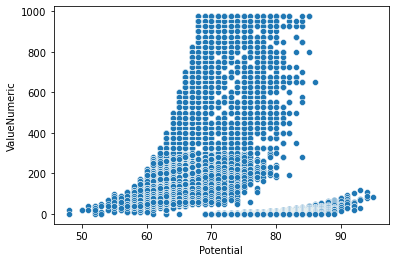

In [38]:
# Your code here:
import seaborn as sns
sns.scatterplot(data=fifa, x='Potential', y='ValueNumeric')